Why ML Model: Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.

This will save resource and their time ( which is directly involved in the cost ( resource billing)).

Develop model with Duration and without duration feature and report the performance of the model.

Duration feature is not recommended as this will be difficult to explain the result to business and also it will

be difficult for business to campaign based on duration.

Imbalance data set : If dataset is imbalance then try to use techniques to handle imbalance data set and report model performance of each imbalance technique used (avoid techniques which recommend not to utilize whole available data)

Task:
 
* Business Understanding 
* Data understanding (Define The Project)
* Before Fit:
** **Data Preparation** 
** **Data Normalization** 
** **Exploratory data Analysis(EDA)** 
** **Feature Engineering** 



* Model Building ( Logistic Regression, ensemble, Boosting etc)
* Model Selection
* Performance reporting
* Deploy the model
* Converting ML metrics into Business metric and explaining result to business
* Prepare presentation for non technical persons.

**Data Types**


**Having a good understanding of the different data types is a crucial prerequisite for doing EDA**

**Why the Data Type is Important??**
* It Affect on the Algortihm Selection
* It Affect on Feature Engineering
* It Affect on Dataset generation (Shuffling the Data)
* It Affect on Visualization
* It Affect on Evaluation



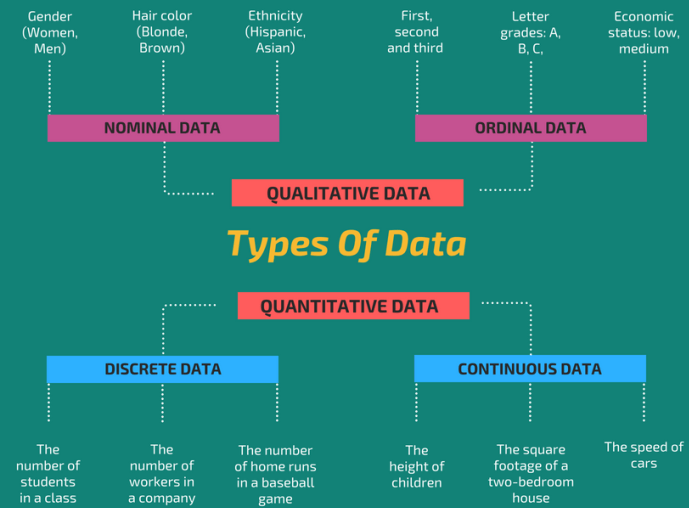

#Problem Description

ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).

#Business Understanding

The plan is to help ABC company to provide a short list of customer that are more likely to buy their product based on their bank details information such as loan. Marital status, account balance etc. This goal will be achievable by using a sophisticated machine learning algorithm capable of using a customer record to predict their future action in a blink of an eye to reduce the company’stime and resources.
A well detail objective and success criteria is explained below
•
•
Objective: ABC Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc) can focus only to those customers whose chances of buying the product ismore.
The success criteria: for this business problem would be based on how much maximum number of customers we are able to predict who have subscribed to the product.


# Attribute Information:

Input variables:

**bank client data:**

1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). 

Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**Social and economic context attributes**
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

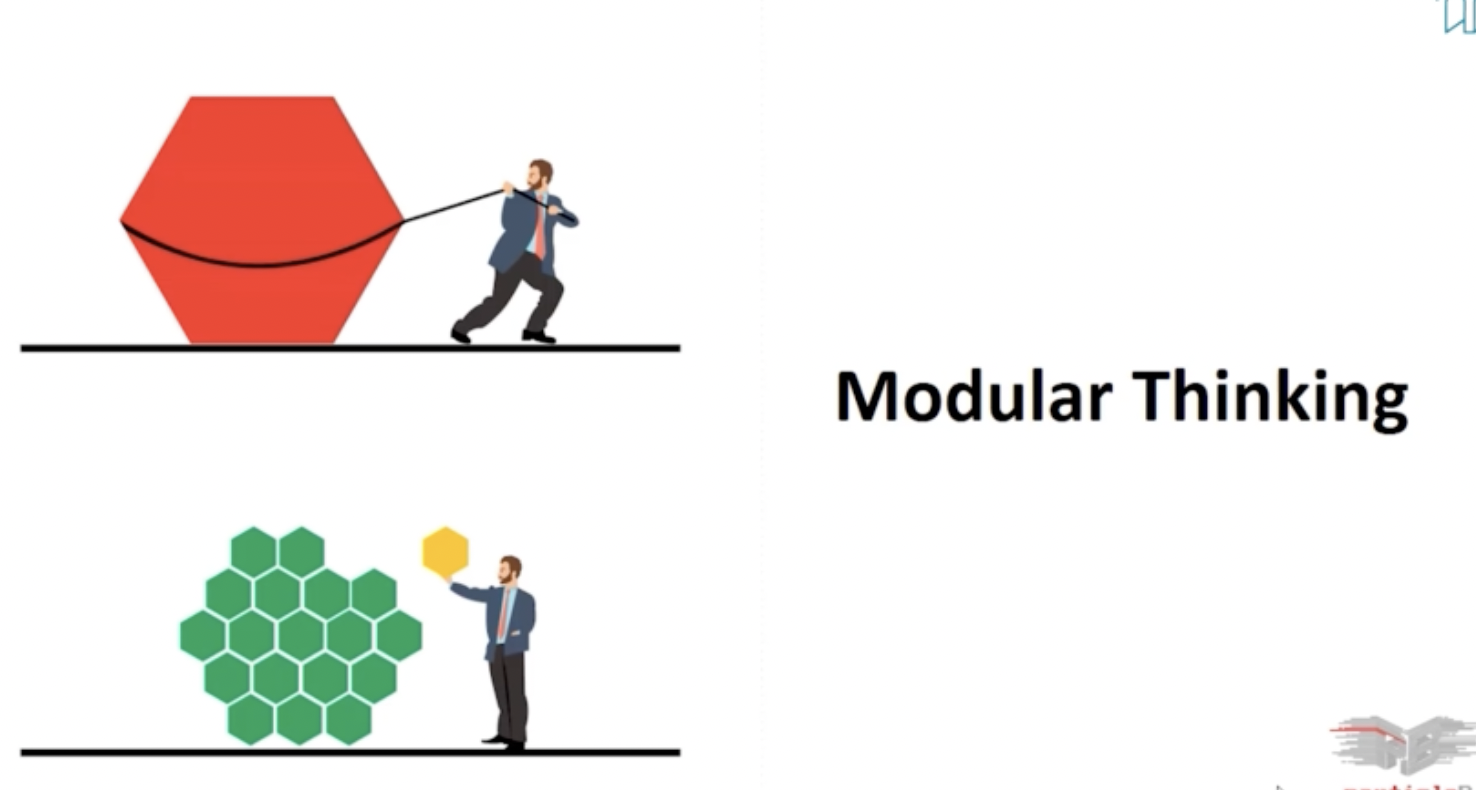

**Problem Methodology**

* Define the Project
* Model the Project
* Solve the Problem
* Evaluate the Problem

In most cases, We can use CRISP Methodology for the steps of solving Problem 

* CRISP Methodolgy 

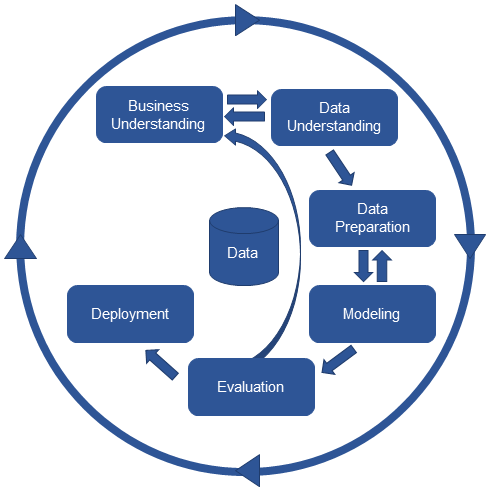

# Before Fit


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

from sklearn import metrics
from sklearn.model_selection import cross_validate

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20


from matplotlib import rcParams # Change the size of plot in seaborn library

## Import Dataset

In [2]:
bank_df = pd.read_csv('https://raw.githubusercontent.com/amirshq/week-7---Bank-Marketing-Campaign-/main/bank/bank-full%20copy.csv')
bank_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_add_df = pd.read_csv('https://raw.githubusercontent.com/amirshq/week-7---Bank-Marketing-Campaign-/main/bank-additional/bank-additional-full2.csv')
bank_add_df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Cleaning

In [6]:
bank_df['default'] = bank_df['default'].map({'yes':1 ,'no':0})
bank_df['housing'] = bank_df['housing'].map({'yes':1  , 'no':0})
bank_df['loan'] = bank_df['loan'].map({'yes':1,'no':0})
bank_df['y'] = bank_df['y'].map({'yes':1,'no':0})

In [7]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [8]:
#Dropping unknow values form dataset
bank_df.drop(bank_df[bank_df['job'] == 'unknown' ].index , inplace=True)
bank_df.drop(bank_df[bank_df['marital'] == 'unknown' ].index , inplace=True)
bank_df.drop(bank_df[bank_df['education'] == 'unknown' ].index , inplace=True)
bank_df.drop(bank_df[bank_df['default'] == 'unknown' ].index , inplace=True)
bank_df.drop(bank_df[bank_df['housing'] == 'unknown' ].index , inplace=True)
bank_df.drop(bank_df[bank_df['loan'] == 'unknown' ].index , inplace=True)

In [9]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


## 1- Data Understanding

In [10]:
bank_df.value_counts('y')

y
0    38172
1     5021
dtype: int64

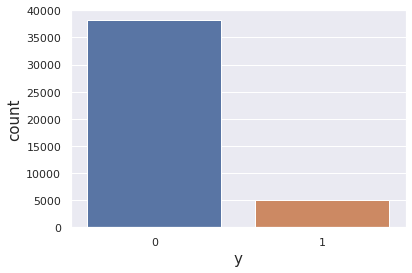

In [11]:
sns.countplot(x="y", data = bank_df)

In [12]:
bank_df.loan.value_counts()

0    36086
1     7107
Name: loan, dtype: int64

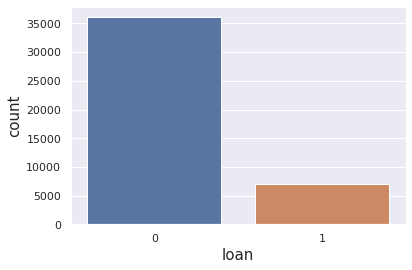

In [13]:
sns.countplot(x="loan", data = bank_df)

In [14]:
cnoloan = len(bank_df[bank_df['y']==0])
cyesloan= len(bank_df[bank_df['y']==1])
print(f'percentage of customers that cannot have a loan: {cnoloan/len(bank_df.y)*100:.2f}%')
print(f'percentage of customers that can have a loan: {cyesloan/len(bank_df.y)*100:.2f}%')

percentage of customers that cannot have a loan: 88.38%
percentage of customers that can have a loan: 11.62%


In [15]:
bank_df.groupby('y').mean()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
y,,,,,,,,,,
0,40.669679,0.019229,1297.333176,0.587289,0.173792,15.900529,221.115949,2.838704,36.709394,0.507230
1,41.481777,0.009560,1785.043019,0.373232,0.094204,15.116710,541.191994,2.145987,68.492731,1.175065


Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data

In [16]:
bank = pd.read_csv('https://raw.githubusercontent.com/amirshq/week-7---Bank-Marketing-Campaign-/main/bank/bank-full%20copy.csv')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


**skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data**

In [17]:
#compute skewness 

cols = ['age','balance','duration','campaign','pdays','previous']
for i in cols:
    print(f'The skewness for {i} = {bank_df[i].skew()}')
    #print(f'Skewness {i}: {str(bank_df[item].skew())}')

The skewness for age = 0.6978356364509636
The skewness for balance = 8.400120937754398
The skewness for duration = 3.1701799697784785
The skewness for campaign = 4.7924941810208885
The skewness for pdays = 2.608337543002269
The skewness for previous = 42.08877792244101


## Outlier Analysis

### Plot the Boxplot to find the Outliers

In [18]:
import math
def multiple_eda_continuous(data, list_continuous):
    n_rows = math.ceil(len(list_continuous)/3)                 #Round a number upward to its nearest integer - Round be balla - Tedade rows - tedade chart ha mehvare Y
    fig = plt.figure(figsize=(12,n_rows*5))                    
    palette = sns.color_palette('Set2', 10)                    #color of charts

    for i, variable in enumerate(list_continuous):
        ax = fig.add_subplot(n_rows,3,i+1)
        sns.boxplot(x=variable, data=data, palette=[palette[i]], ax=ax)
        ax.set_ylabel('')
        ax.set_title(variable)

    plt.tight_layout()
    plt.show()

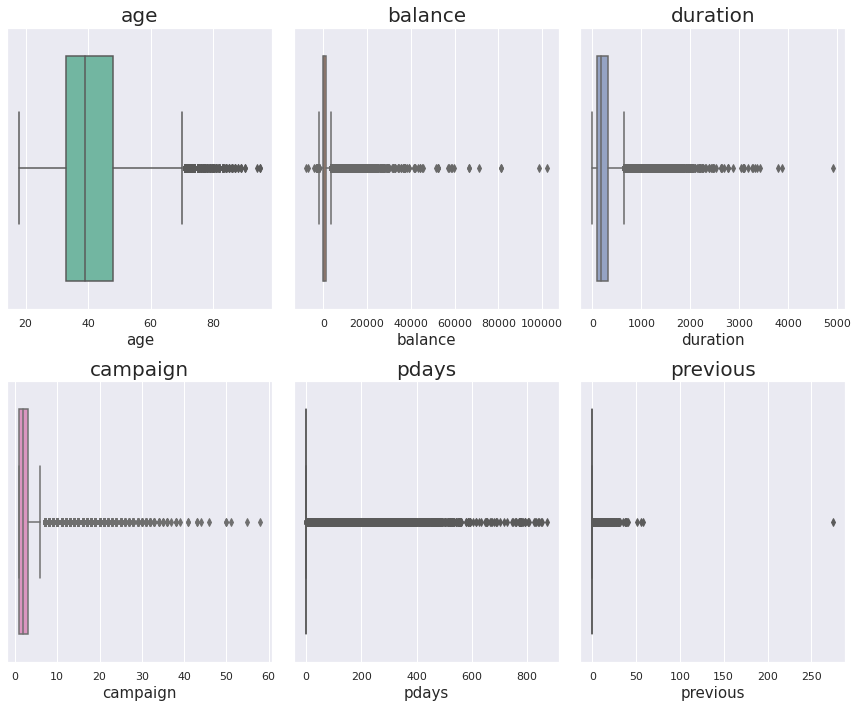

In [19]:
multiple_eda_continuous(bank_df, cols)

**Interquartile range = IQR**

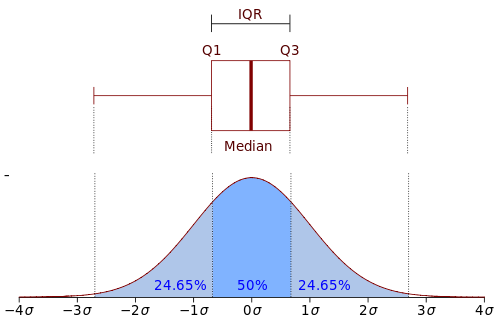

**<span class="mark">The difference between a good and an average machine learning model is often its ability to clean data. One of the biggest challenges in data cleaning is the identification and treatment of outliers. In simple terms, outliers are observations that are significantly different from other data points. Even the best machine learning algorithms will underperform if outliers are not cleaned from the data because outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy</span>.**

In [20]:
# IQR score
Q1 = bank_df.quantile(0.25)
Q3 = bank_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

bank_out = bank_df[~((bank_df < (Q1 - 1.5 * IQR)) |(bank_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(bank_out.shape)

age           15.0
default        0.0
balance     1341.0
housing        1.0
loan           0.0
day           13.0
duration     215.0
campaign       2.0
pdays          0.0
previous       0.0
y              0.0
dtype: float64
(20327, 17)


In [21]:
cols=["age","duration","campaign","pdays","previous","balance"]
for i in cols:
    print(f"Skewness {i} : " + str(bank_out[i].skew()))

Skewness age : 0.41416767090481166
Skewness duration : 1.0790034845002618
Skewness campaign : 1.1216634134080552
Skewness pdays : 0
Skewness previous : 0
Skewness balance : 1.3639638827560565


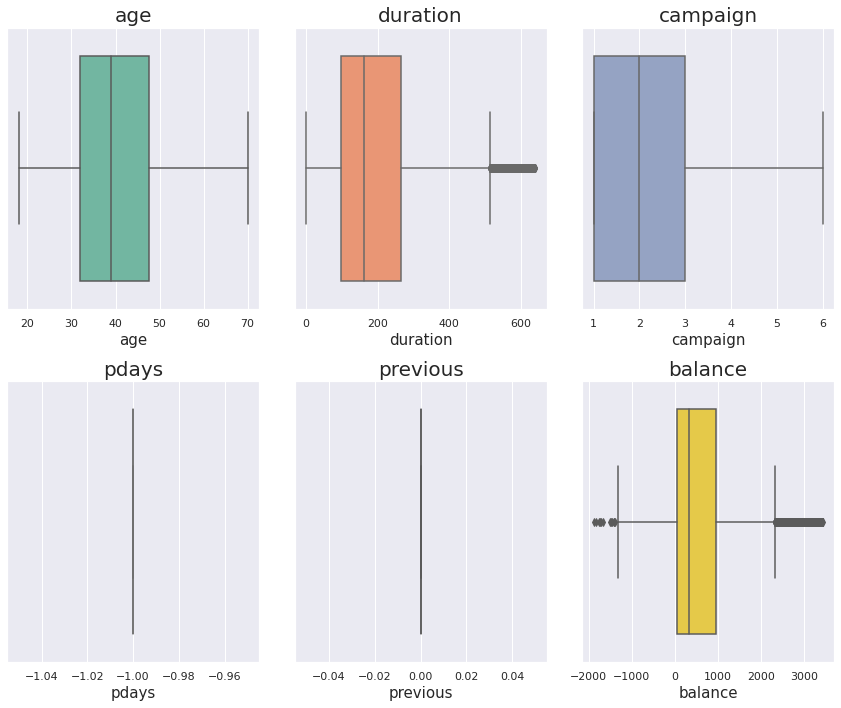

In [22]:
# Check outliers after flooring and capping using IQR
multiple_eda_continuous(bank_out, cols)

In [23]:
bank_df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [24]:
bank_out

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,may,55,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45145,28,services,single,tertiary,0,441,0,0,cellular,8,nov,106,1,-1,0,unknown,0
45161,31,management,married,tertiary,0,720,1,0,cellular,9,nov,94,3,-1,0,unknown,0
45167,48,admin.,married,secondary,0,178,0,0,cellular,10,nov,228,1,-1,0,unknown,0
45198,37,management,married,tertiary,0,1428,0,0,cellular,16,nov,333,2,-1,0,unknown,0


## converting text data columns using label encoder

### Encode the Month column

In [25]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [26]:
#convert months to the numbers
month = list(bank_df.month)
values = array(month)        #change the Type of month from list to array
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
month_list = list(integer_encoded)

In [27]:
bank_df.insert(loc=11, column="month_enc", value = month_list)
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


### Encode the Job Column

In [28]:
#Encode the Job 
job = list(bank_df.job)
values = array(job)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
job_list = list(integer_encoded)

In [29]:
bank_df.insert(loc=2, column ='job_enc', value = job_list)
bank_df

,age,job,job_enc,marital,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


### Encode the Marital Column

In [30]:
marital = list(bank_df.marital)
values = array(marital)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
marital_list = list(integer_encoded)

In [31]:
bank_df.insert(loc=4, column="marital_enc", value = marital_list)
bank_df

,age,job,job_enc,marital,marital_enc,education,default,balance,housing,loan,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,0,2143,1,0,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,0,29,1,0,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,0,2,1,1,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,0,231,1,0,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,0,447,1,1,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,0,825,0,0,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,1729,0,0,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,0,5715,0,0,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,0,668,0,0,telephone,17,nov,9,508,4,-1,0,unknown,0


###  Encode the Education Column

In [32]:
education = list(bank_df.education)
values = array(education)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
education_list = list(integer_encoded)

In [33]:
bank_df.insert(loc=6, column="education_enc", value = education_list)
bank_df

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,unknown,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,unknown,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,unknown,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,unknown,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,unknown,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,cellular,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,cellular,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,cellular,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,telephone,17,nov,9,508,4,-1,0,unknown,0


### Encode the Contact Column

In [34]:
contact = list(bank_df.contact)
values = array(contact)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
contact_list = list(integer_encoded)

In [35]:
bank_df.insert(loc=12, column="contact_enc", value = contact_list)
bank_df

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,contact_enc,day,month,month_enc,duration,campaign,pdays,previous,poutcome,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,2,5,may,8,261,1,-1,0,unknown,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,2,5,may,8,151,1,-1,0,unknown,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,2,5,may,8,76,1,-1,0,unknown,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,2,5,may,8,139,1,-1,0,unknown,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,2,5,may,8,217,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,0,17,nov,9,977,3,-1,0,unknown,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,0,17,nov,9,456,2,-1,0,unknown,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,0,17,nov,9,1127,5,184,3,success,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,1,17,nov,9,508,4,-1,0,unknown,0


### Encode the Poutcome Column

In [36]:
poutcome = list(bank_df.poutcome)
values = array(poutcome)
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
poutcome_list = list(integer_encoded)

In [37]:
bank_df.insert(loc=21, column="poutcome_enc", value = poutcome_list)
bank_df

,age,job,job_enc,marital,marital_enc,education,education_enc,default,balance,housing,...,day,month,month_enc,duration,campaign,pdays,previous,poutcome,poutcome_enc,y
0,58,management,4,married,1,tertiary,2,0,2143,1,...,5,may,8,261,1,-1,0,unknown,3,0
1,44,technician,9,single,2,secondary,1,0,29,1,...,5,may,8,151,1,-1,0,unknown,3,0
2,33,entrepreneur,2,married,1,secondary,1,0,2,1,...,5,may,8,76,1,-1,0,unknown,3,0
5,35,management,4,married,1,tertiary,2,0,231,1,...,5,may,8,139,1,-1,0,unknown,3,0
6,28,management,4,single,2,tertiary,2,0,447,1,...,5,may,8,217,1,-1,0,unknown,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,9,married,1,tertiary,2,0,825,0,...,17,nov,9,977,3,-1,0,unknown,3,1
45207,71,retired,5,divorced,0,primary,0,0,1729,0,...,17,nov,9,456,2,-1,0,unknown,3,1
45208,72,retired,5,married,1,secondary,1,0,5715,0,...,17,nov,9,1127,5,184,3,success,2,1
45209,57,blue-collar,1,married,1,secondary,1,0,668,0,...,17,nov,9,508,4,-1,0,unknown,3,0


In [38]:
bank_df.columns

Index(['age', 'job', 'job_enc', 'marital', 'marital_enc', 'education',
       'education_enc', 'default', 'balance', 'housing', 'loan', 'contact',
       'contact_enc', 'day', 'month', 'month_enc', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'poutcome_enc', 'y'],
      dtype='object')

In [39]:
bank_df = bank_df.drop(['job', 'marital', 'education', 'month', 'contact', 'poutcome'], axis = 1)
bank_df

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [40]:
bank_df.columns

Index(['age', 'job_enc', 'marital_enc', 'education_enc', 'default', 'balance',
       'housing', 'loan', 'contact_enc', 'day', 'month_enc', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome_enc', 'y'],
      dtype='object')

## 2- Normalize Data

## 3- Feature Engineering

## Import Classifier Libraries

In [41]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [42]:
x = bank_df[bank_df.columns[0:16]]
x

,age,job_enc,marital_enc,education_enc,default,balance,housing,loan,contact_enc,day,month_enc,duration,campaign,pdays,previous,poutcome_enc
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3


In [43]:
y = bank_df["y"]
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43193, dtype: int64

#PREDICTION

## Train Test Split the Data

In [44]:
x_train , x_test, y_train , y_test = train_test_split(x,y, test_size = 0.3 , random_state=42)

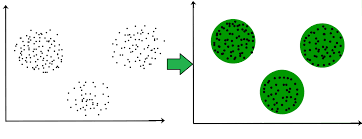

## NonLinear ML Algorithms

### NonLinear Regression -> Logistic Regression


In [45]:
from sklearn.linear_model import LogisticRegression 

In [46]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [47]:
predictions=logmodel.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error

In [49]:
accuracy_score(predictions,y_test)

0.8873282914029943

# CLASSIFICATION 

## XGBoosting classifier - Model 1

In [50]:
#XGBModel 
XG_classifier = XGBClassifier(random_state=455)
XG_classifier.fit(x_train, y_train)

XGBClassifier(random_state=455)

In [51]:
prediction = XG_classifier.predict(x_test)

In [52]:
(y_test, prediction)

(42248    1
 9349     0
 3153     0
 3043     0
 5365     0
         ..
 37181    0
 38598    0
 27085    0
 34886    0
 18571    0
 Name: y, Length: 12958, dtype: int64, array([0, 0, 0, ..., 0, 0, 0]))

How in the hell can we measure the effectiveness of our model. Better the effectiveness, better the performance, and that is exactly what we want. And it is where the Confusion matrix comes into the limelight. **Confusion Matrix is a performance measurement for machine learning classification.**

In [53]:
cf = confusion_matrix(y_test, prediction)
cf 

array([[11157,   288],
       [  946,   567]])

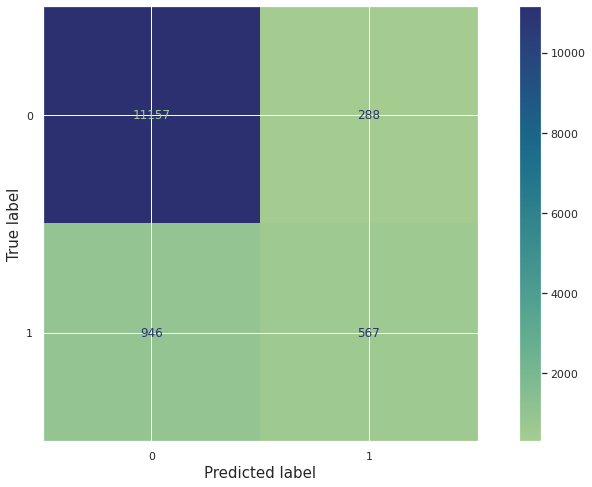

In [54]:
rcParams['figure.figsize'] = 15,8
metrics.plot_confusion_matrix(XG_classifier, x_test, y_test,cmap ='crest')

In [55]:
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11445
           1       0.66      0.37      0.48      1513

    accuracy                           0.90     12958
   macro avg       0.79      0.67      0.71     12958
weighted avg       0.89      0.90      0.89     12958



### Evaluation Metrics


Performance metrics are a part of every machine learning pipeline. They tell you if you’re making progress, and put a number on it. All machine learning models, whether it’s linear regression, or a SOTA technique like BERT, need a metric to judge performance.

Every machine learning task can be broken down to either Regression or Classification, just like the performance metrics. There are dozens of metrics for both problems, but we’re gonna discuss popular ones along with what information they provide about model performance. It’s important to know how your model sees your data!

If you ever participated in a Kaggle competition, you probably noticed the evaluation section. More often than not, there’s a metric on which they judge your performance.

Metrics are different from loss functions. Loss functions show a measure of model performance. They’re used to train a machine learning model (using some kind of optimization like Gradient Descent), and they’re usually differentiable in the model’s parameters. 

Metrics are used to monitor and measure the performance of a model (during training and testing), and don’t need to be differentiable. 

However, if for some tasks the performance metric is differentiable, it can also be used as a loss function (perhaps with some regularizations added to it), such as MSE.

**Regression metrics**

Regression models have continuous output. So, we need a metric based on calculating some sort of distance between predicted and ground truth.

In order to evaluate Regression models, we’ll discuss these metrics in detail:

* Mean Absolute Error (MAE),
* Mean Squared Error (MSE),
* Root Mean Squared Error (RMSE),
* R² (R-Squared).

**Classification metrics**

* Accuracy
* Confusion Matrix (not a metric but fundamental to others)
* Precision and Recall
* F1-score
* AU-ROC (Area under Receiver operating characteristics curve)

#### precision-recall curve Description




FUll Description: https://www.youtube.com/watch?v=4jRBRDbJemM

**The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).**

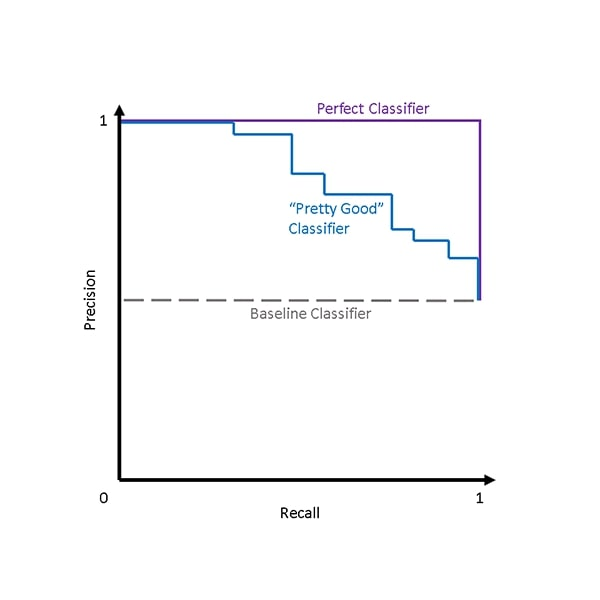

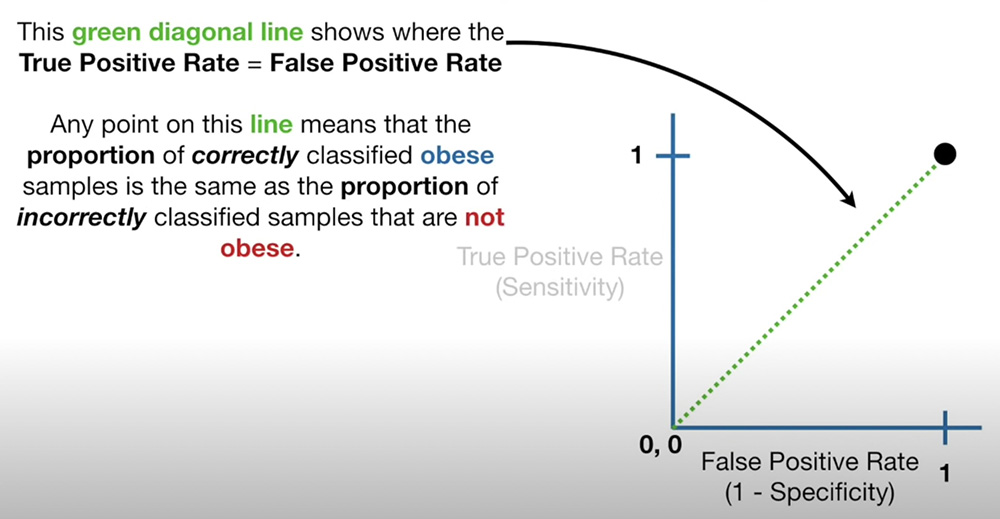

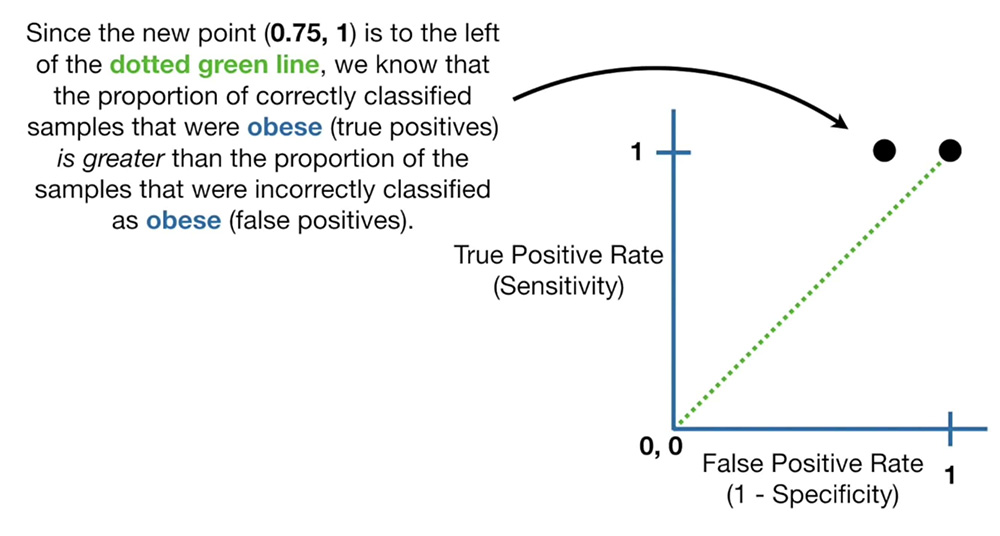

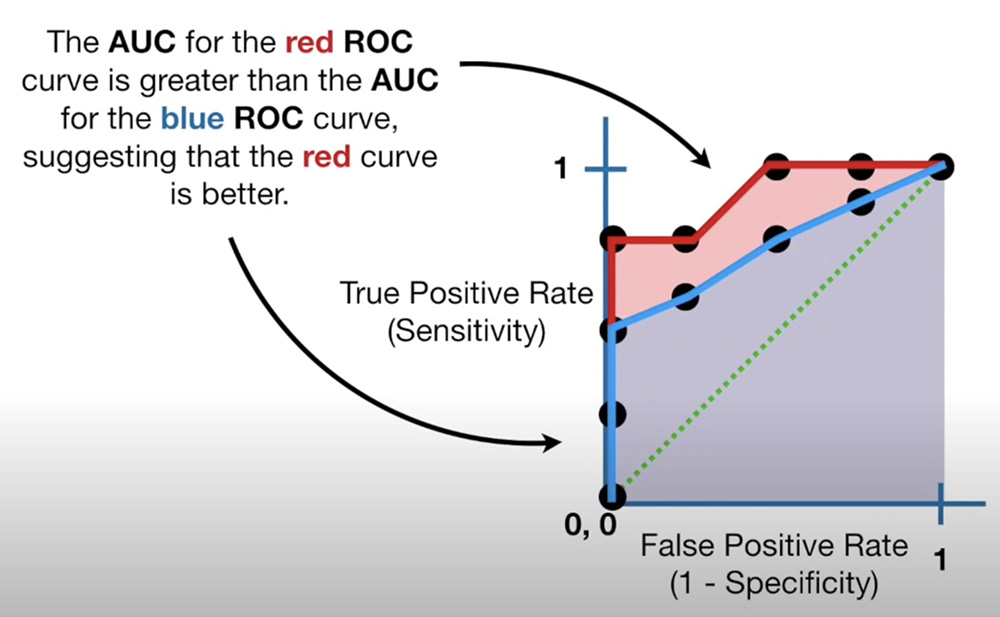

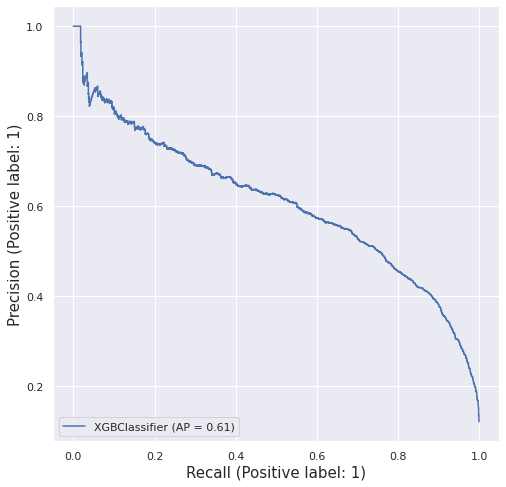

In [56]:
#XGBoosting classifier  
fig, ax = plt.subplots(1,1,figsize= (8,8))
metrics.plot_precision_recall_curve(XG_classifier, x_test, y_test, ax=ax)

#### ROC Curve

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

* True Positive Rate
* False Positive Rate

**True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows**:

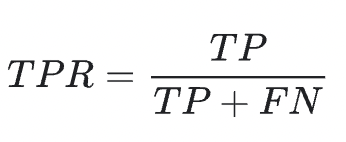

**False Positive Rate (FPR) is defined as follows:**

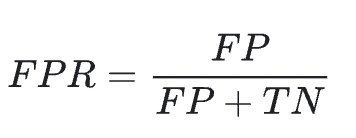

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

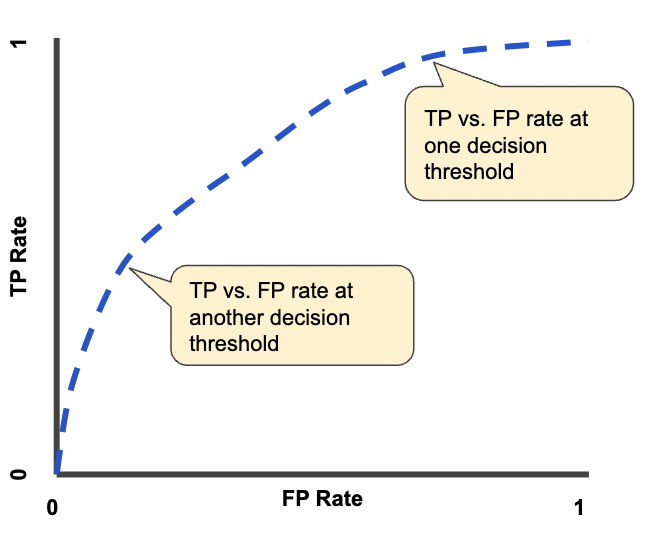

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

#### AUC: Area Under the ROC Curve

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

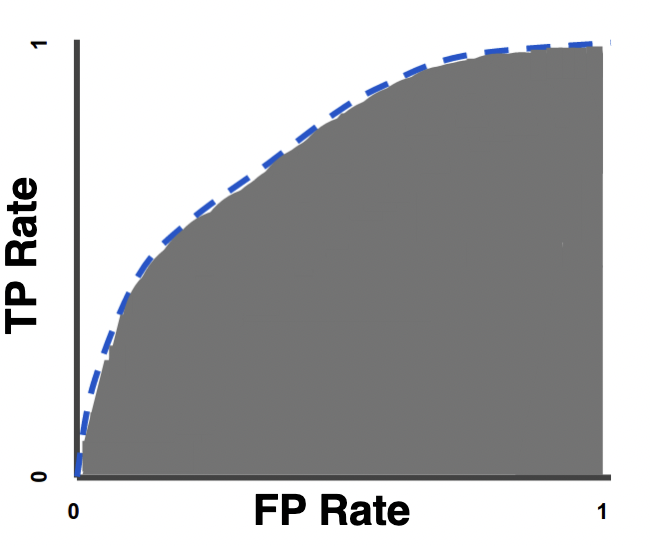

**Area Under Curve (AUC) score represents the degree or measure of separability. A model with higher AUC is better at predicting True Positives and True Negatives. AUC score measures the total area underneath the ROC curve. AUC is scale invariant and also threshold invariant**

#### Compute the AUC (Area Under the ROC curve) for XGBoosting Classifier

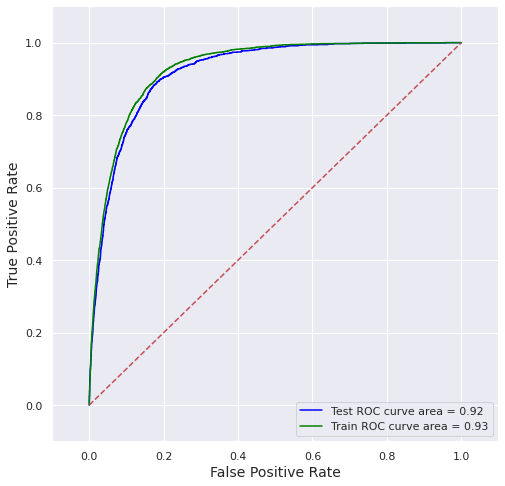

In [57]:
#XGBoosting classifier
sns.set_style('darkgrid')
preds_train = XG_classifier.predict(x_train)
# calculate prediction probability
prob_train1 = np.squeeze(XG_classifier.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test1 = np.squeeze(XG_classifier.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train1)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))


# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

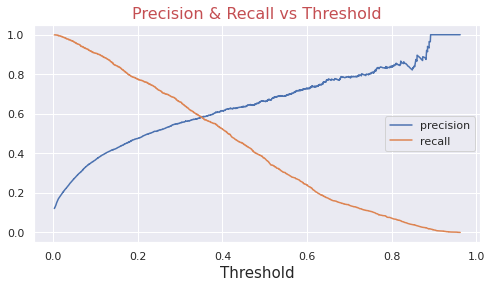

In [58]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test1)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

## Cat Boosting classifier - Model 2

In [59]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 83 kB/s 


### CatBoost implementation 

In [60]:
from catboost import CatBoostClassifier

cat_features = list(range(0, x.shape[1]))
print(cat_features)

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(x_train, y_train, 
        cat_features=cat_features,  
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


### Stdout of the training 

**Stdout stands for Standard Output in Python**

In [61]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=500,
    random_seed=42,
    learning_rate=0.1,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    x_train, y_train,
    cat_features=cat_features,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [62]:
from google.colab import output
output.enable_custom_widget_manager()

In [63]:
predictions_clf = clf.predict(x_test)

In [64]:
accuracy_score(y_test,predictions_clf)

0.9115604259916654

In [65]:
cf = confusion_matrix(y_test,predictions_clf)
cf

array([[11096,   349],
       [  797,   716]])

### Evaluation Metrics

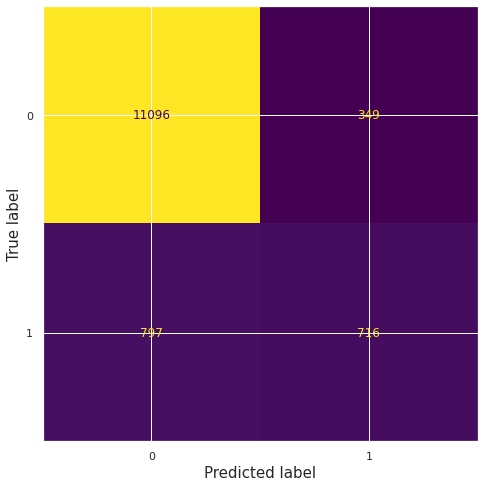

In [66]:
metrics.plot_confusion_matrix(clf, x_test, y_test,colorbar = False)


In [67]:
print(metrics.classification_report(y_test, predictions_clf))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11445
           1       0.67      0.47      0.56      1513

    accuracy                           0.91     12958
   macro avg       0.80      0.72      0.75     12958
weighted avg       0.90      0.91      0.90     12958



**The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).**


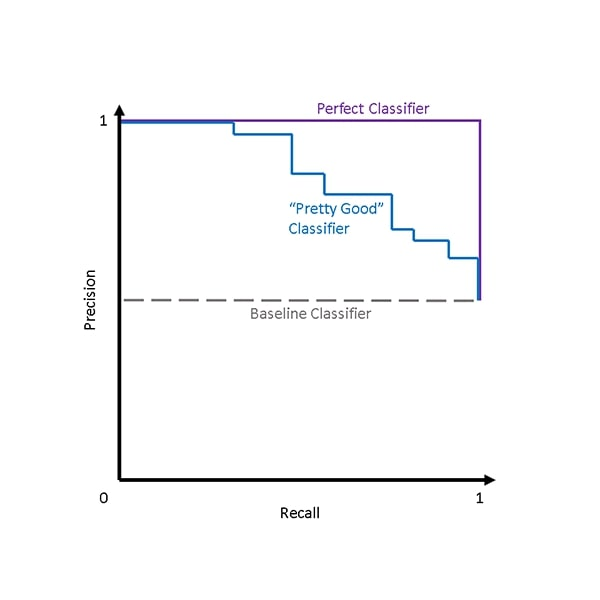

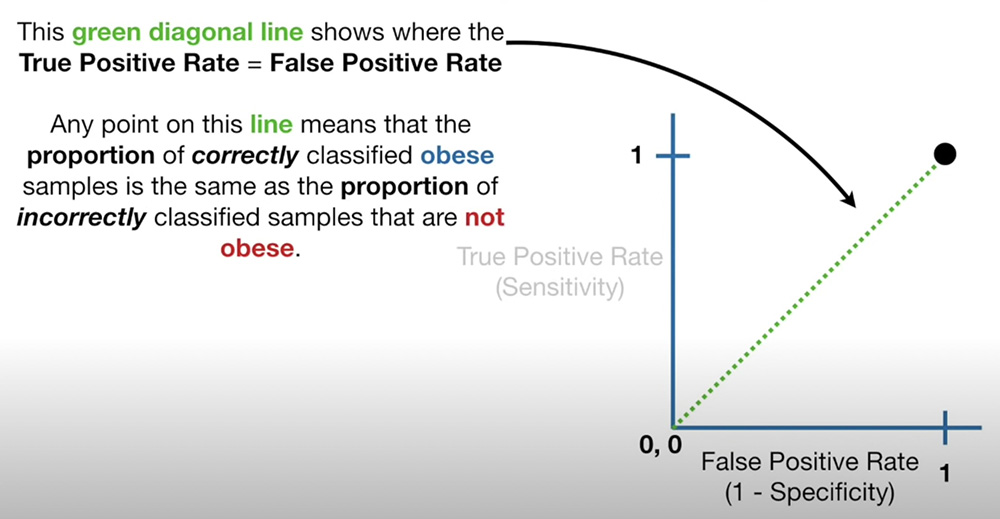

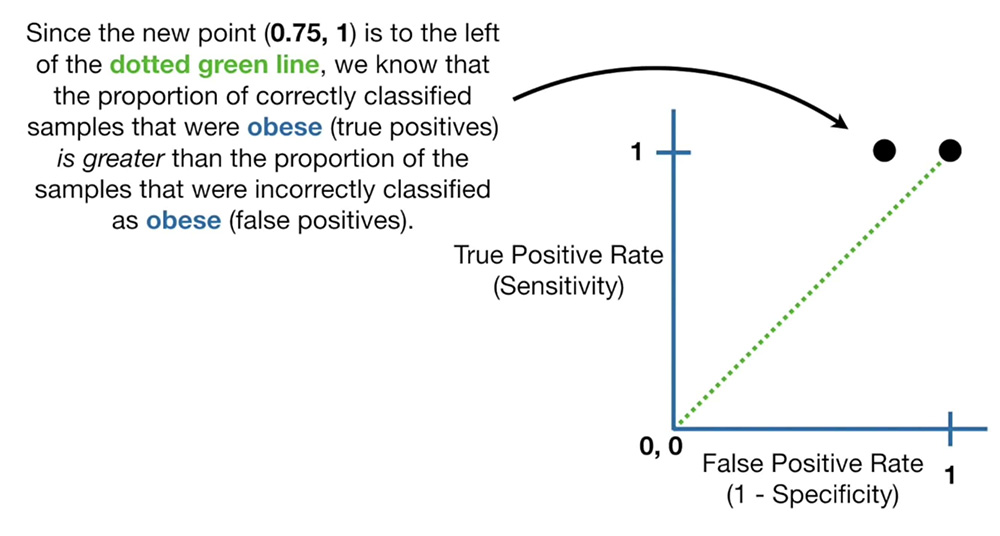

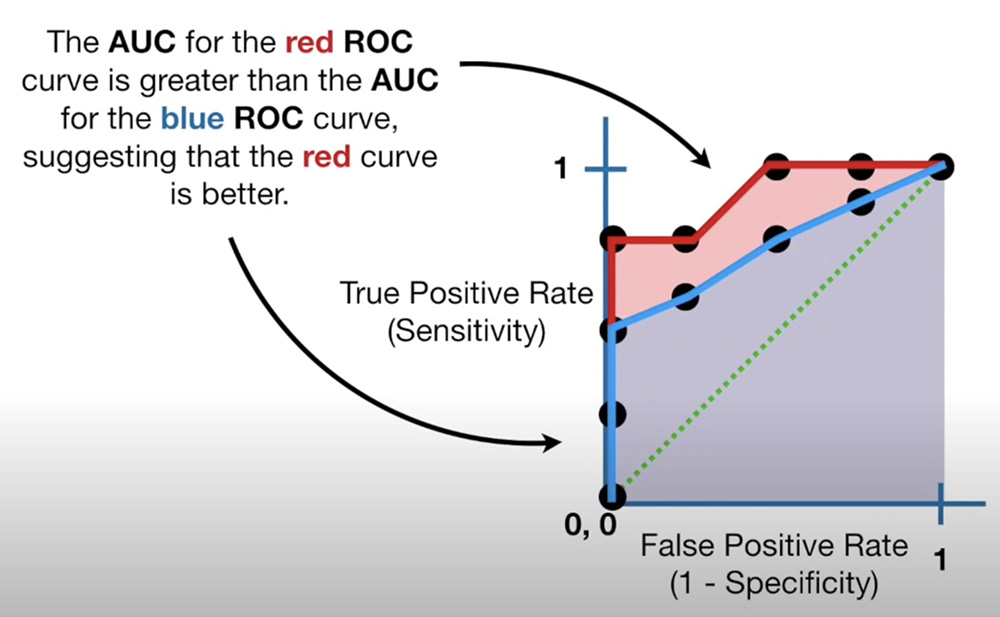

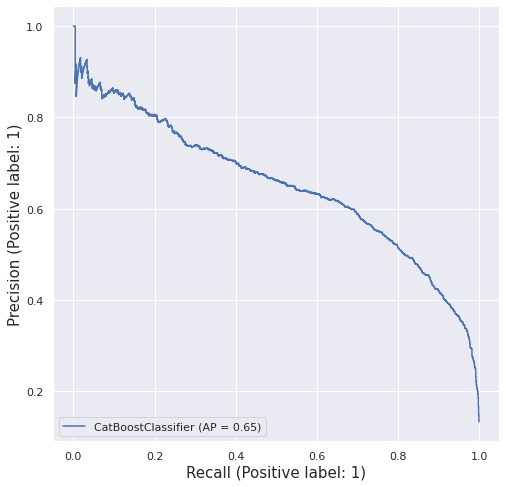

In [68]:
#cat boosting classifier
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(clf, x_test, y_test, ax=ax)

#### Compute the AUC (Area Under the ROC curve) for Cat Boosting Classifier

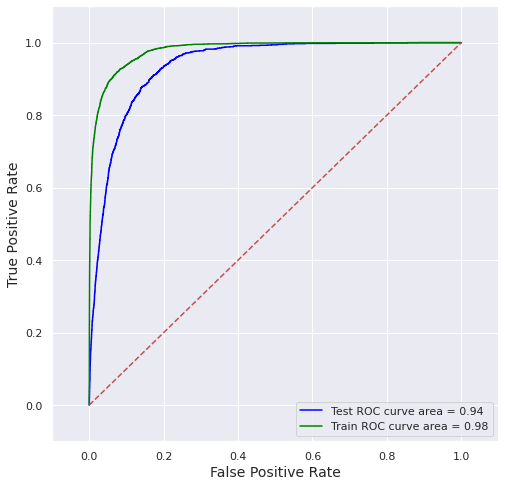

In [69]:
#cat boosting algorithm
sns.set_style('darkgrid')
preds_train = clf.predict(x_train)
# calculate prediction probability
prob_train4 = np.squeeze(clf.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test4 = np.squeeze(clf.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test4)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train4)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

**It is evident from the plot that the AUC for the Logistic Regression ROC curve is higher than that for the KNN ROC curve. Therefore, we can say that logistic regression did a better job of classifying the positive class in the dataset.**



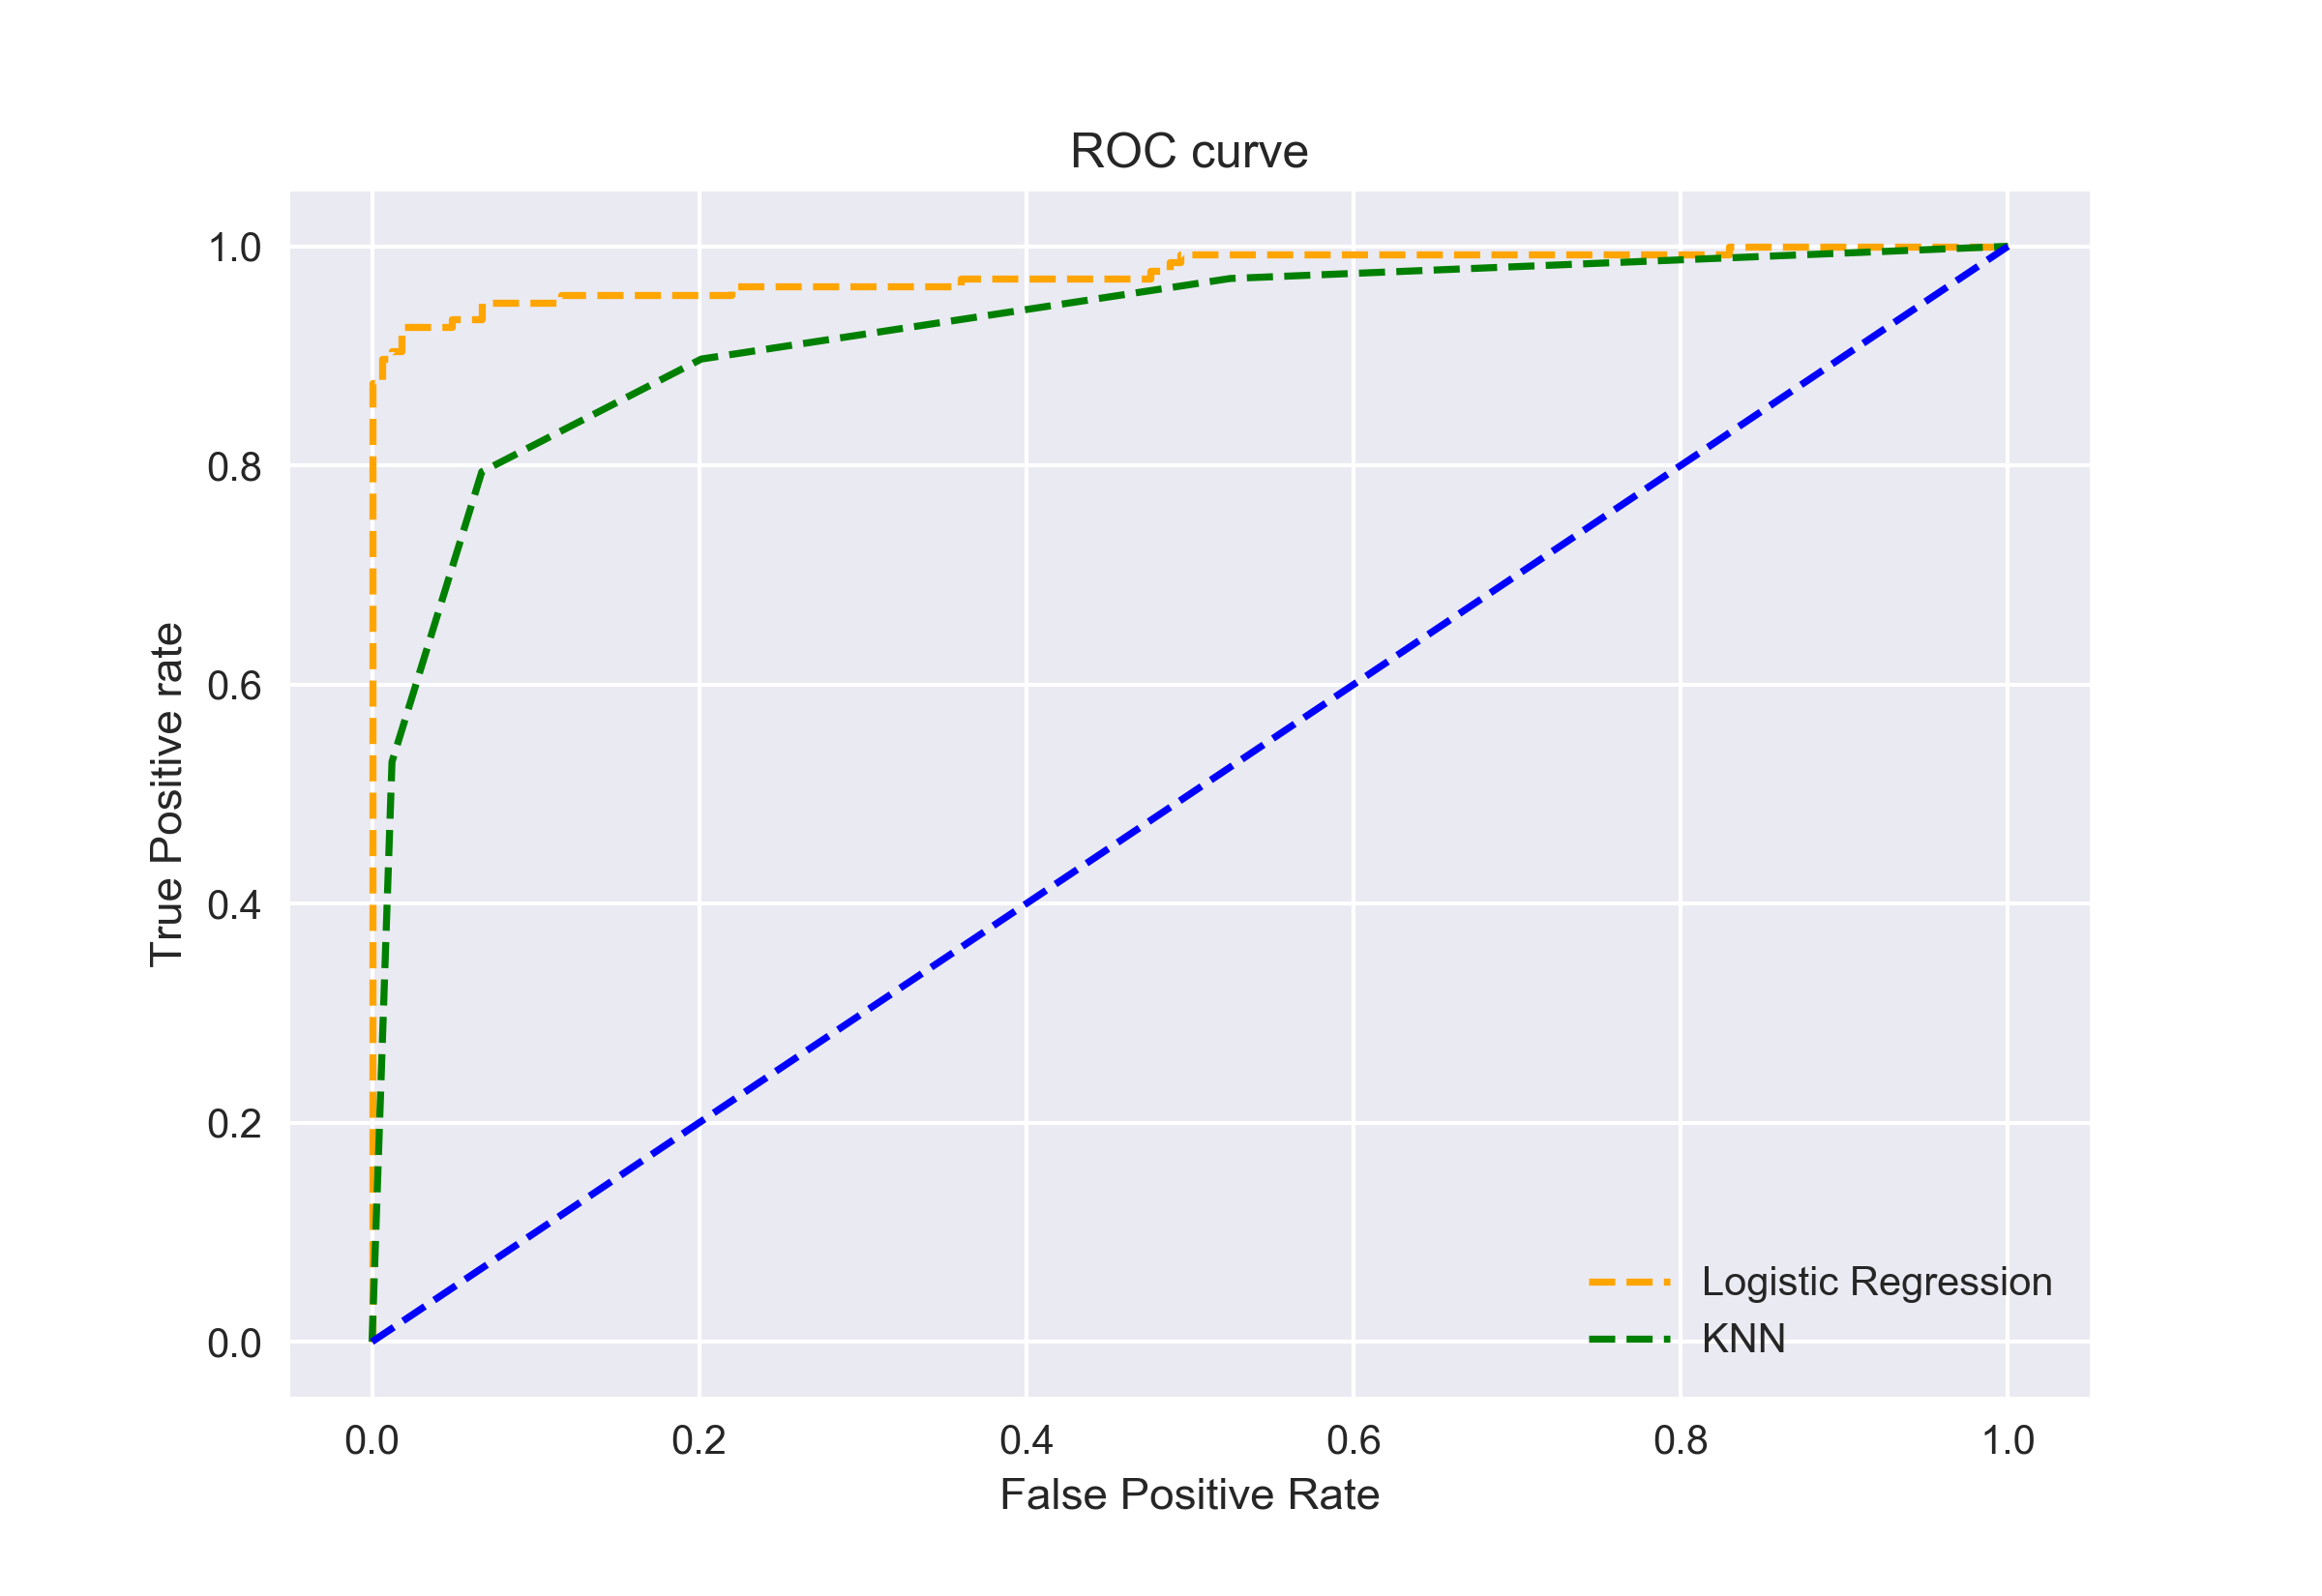

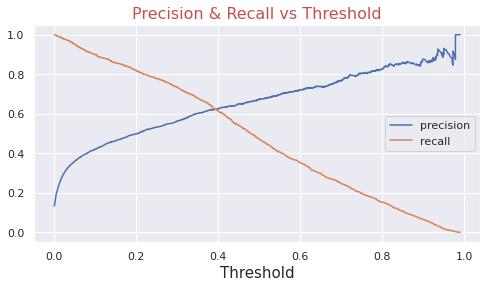

In [70]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test4)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

## Gradient Boosting classifier - Model 3

### Gradient Boosting Implementation

In [71]:
gbmodel = GradientBoostingClassifier()
gbmodel.fit(x_train,y_train)

GradientBoostingClassifier()

In [72]:
predictions_gb = gbmodel.predict(x_test)

In [73]:
accuracy_score(y_test,predictions_gb)

0.903843185676802

In [74]:
cf = confusion_matrix(y_test,predictions_gb)
cf

array([[11117,   328],
       [  918,   595]])

### Evaluation Metrics

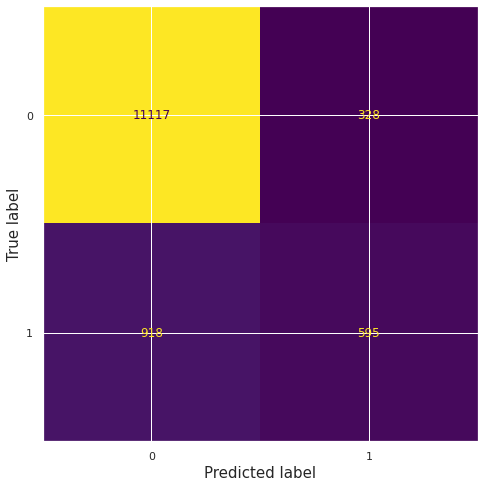

In [75]:
metrics.plot_confusion_matrix(gbmodel, x_test, y_test,colorbar = False)


In [76]:
print(metrics.classification_report(y_test, predictions_gb))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11445
           1       0.64      0.39      0.49      1513

    accuracy                           0.90     12958
   macro avg       0.78      0.68      0.72     12958
weighted avg       0.89      0.90      0.89     12958



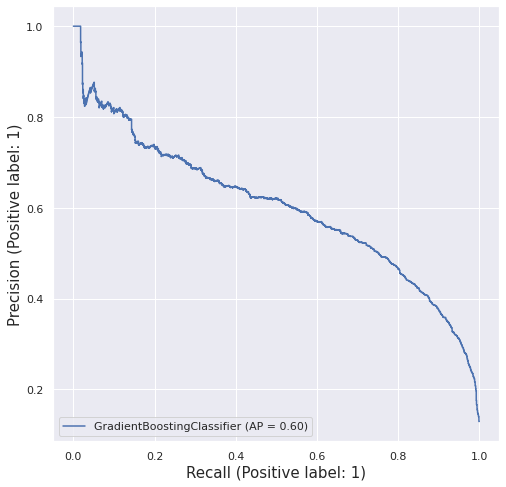

In [77]:
#gradient boosting classifier
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(gbmodel, x_test, y_test, ax=ax)

#### Compute the AUC (Area Under the ROC curve) for Gradient Boosting classifier

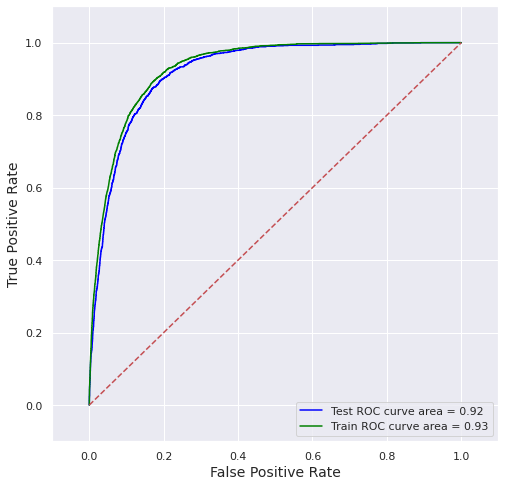

In [78]:
#gradient boosting model
sns.set_style('darkgrid')
preds_train = gbmodel.predict(x_train)
# calculate prediction probability
prob_train2 = np.squeeze(gbmodel.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test2 = np.squeeze(gbmodel.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test2)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train2)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

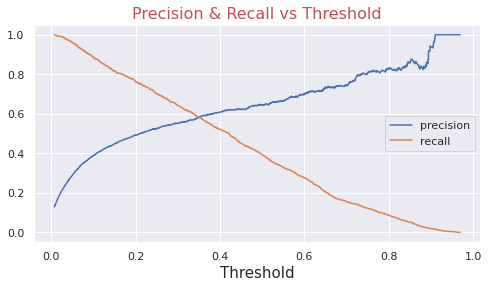

In [79]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test2)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

## Logistic regression - Model 4

In [80]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

LogisticRegression()

In [81]:
predictions_lg = logmodel.predict(x_test)

In [82]:
accuracy_score(y_test,predictions_lg)

0.8873282914029943

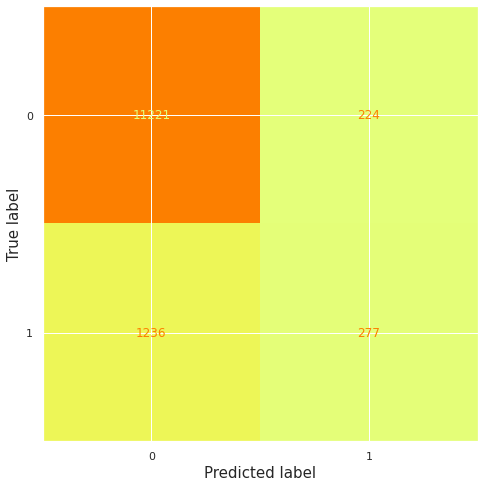

In [83]:
metrics.plot_confusion_matrix(logmodel, x_test, y_test,colorbar = False, cmap=plt.cm.Wistia)

In [84]:
print(metrics.classification_report(y_test, predictions_lg))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11445
           1       0.55      0.18      0.28      1513

    accuracy                           0.89     12958
   macro avg       0.73      0.58      0.61     12958
weighted avg       0.86      0.89      0.86     12958



**The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).**

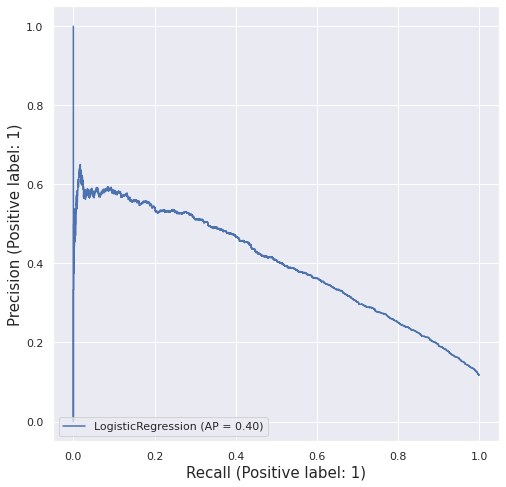

In [85]:
#logistic regression
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(logmodel, x_test, y_test, ax=ax)

### Evaluation Metrics

#### Compute the AUC (Area Under the ROC curve) for Logistic Regression

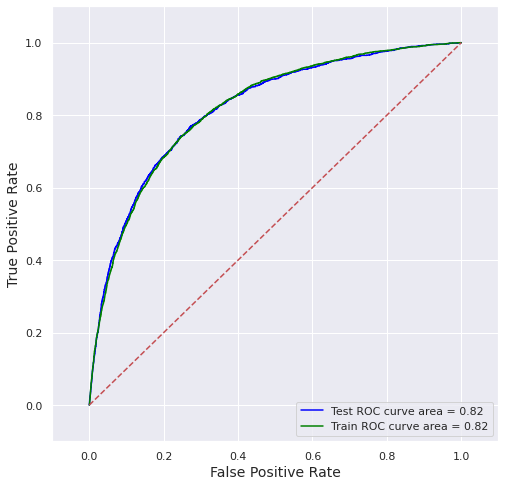

In [86]:
#logistic regression
sns.set_style('darkgrid')
preds_train = logmodel.predict(x_train)
# calculate prediction probability
prob_train3 = np.squeeze(logmodel.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test3 = np.squeeze(logmodel.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test3)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train3)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

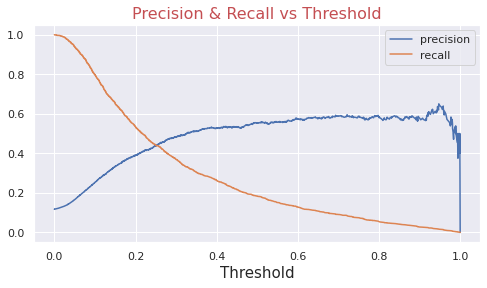

In [87]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test3)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

## K-Nearest Classifier 

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=2 , random_state=None)
model = KNeighborsClassifier()
results = cross_val_score(model,x,y ,cv =kfold)
print(f'mean estimated accuracy of K Nearest Neighbor model: {results.mean()}')

mean estimated accuracy of K Nearest Neighbor model: 0.8731495225266027


In [89]:
knearmodel = KNeighborsClassifier()
knearmodel.fit(x_train, y_train)

KNeighborsClassifier()

In [90]:
Knearpredict = knearmodel.predict(x_test)

In [91]:
accuracy_score(y_test, Knearpredict)

0.8826979472140762

### Evaluation Metrics

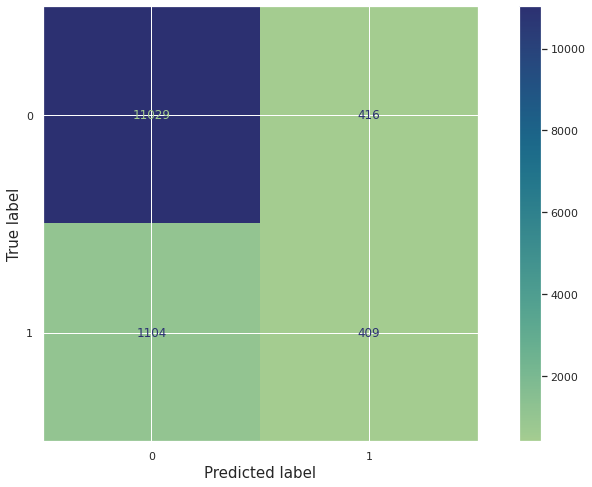

In [92]:
metrics.plot_confusion_matrix(knearmodel, x_test, y_test, cmap='crest')

In [93]:
print(metrics.classification_report(y_test, Knearpredict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94     11445
           1       0.50      0.27      0.35      1513

    accuracy                           0.88     12958
   macro avg       0.70      0.62      0.64     12958
weighted avg       0.86      0.88      0.87     12958



**The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).**


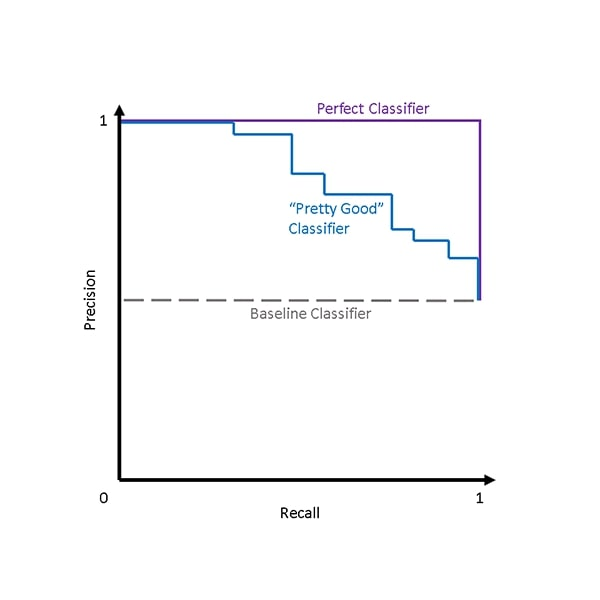

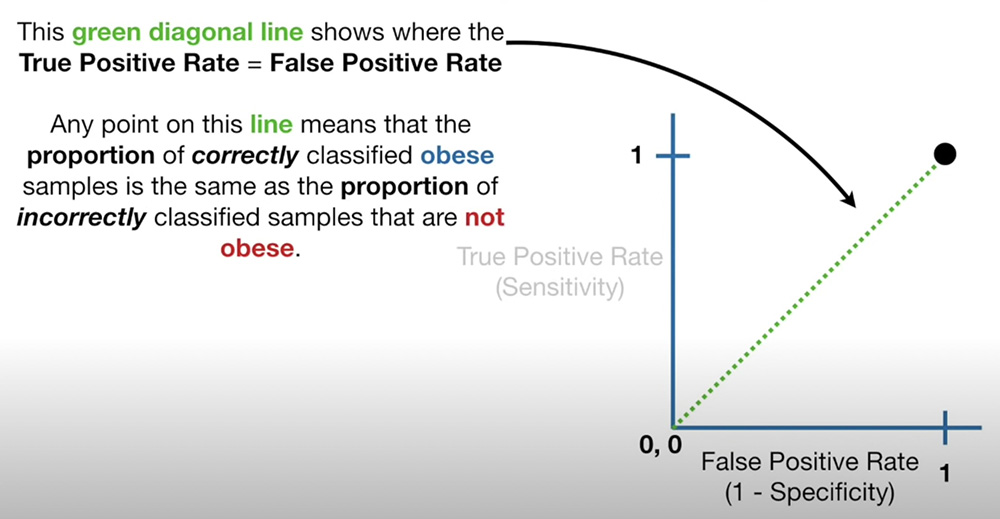

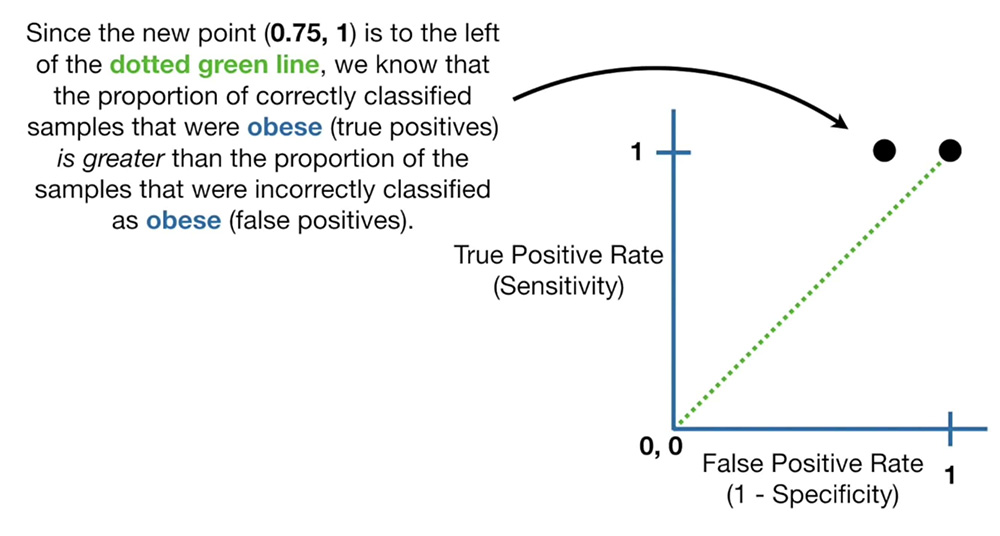

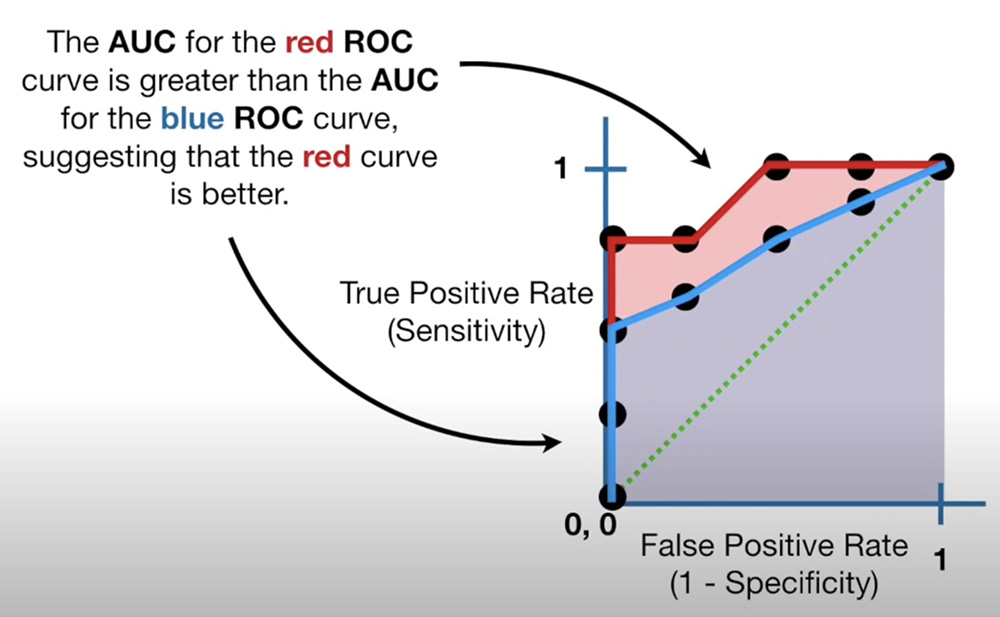

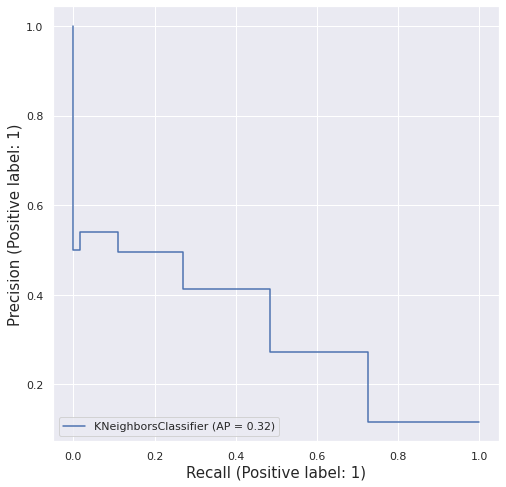

In [94]:
#Knearest Neighbor Classifier
fig, ax = plt.subplots(1,1, figsize=(8,8))
metrics.plot_precision_recall_curve(knearmodel, x_test, y_test, ax=ax)

#### Compute the AUC (Area Under the ROC curve) for K-nearest Method

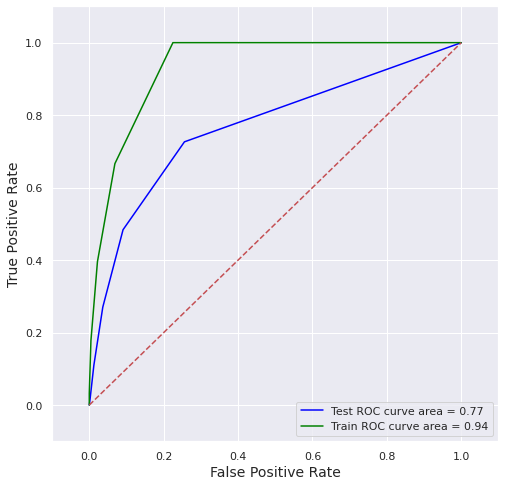

In [95]:
#Knearest Neighbor
sns.set_style('darkgrid')
preds_train = knearmodel.predict(x_train)
# calculate prediction probability
prob_train4 = np.squeeze(knearmodel.predict_proba(x_train)[:,1].reshape(1,-1))
prob_test4 = np.squeeze(knearmodel.predict_proba(x_test)[:,1].reshape(1,-1))
# false positive rate, true positive rate, thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, prob_test4)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_train, prob_train4)
# auc score
auc1 = metrics.auc(fpr1, tpr1)
auc2 = metrics.auc(fpr2, tpr2)
plt.figure(figsize=(8,8))
# plot auc 
plt.plot(fpr1, tpr1, color='blue', label='Test ROC curve area = %0.2f'%auc1)
plt.plot(fpr2, tpr2, color='green', label='Train ROC curve area = %0.2f'%auc2)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend(loc='lower right')
plt.show()

####Precision and Recall Vs Threshold for Knearest Classifier 


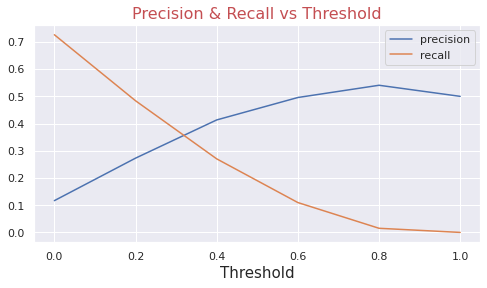

In [96]:
pre, rec, thr = metrics.precision_recall_curve(y_test, prob_test4)
plt.figure(figsize=(8,4))
plt.plot(thr, pre[:-1], label='precision')
plt.plot(thr, rec[1:], label='recall')
plt.xlabel('Threshold')
plt.title('Precision & Recall vs Threshold', c='r', size=16)
plt.legend()
plt.show()

## Compute Entropy of XGBoosting, Gradient Boosting, Logistic Regression and Catboost classifier

In [97]:
# Entropy loss_xgboosting classifier
cross_entropy_loss = metrics.log_loss(y_test, prob_test1)
cross_entropy_loss

0.2132938384714388

In [98]:
# Entropy loss_gradient boosting classifier
cross_entropy_loss = metrics.log_loss(y_test, prob_test2)
cross_entropy_loss

0.2146100934291298

In [99]:
# Entropy loss_logistic regression
cross_entropy_loss = metrics.log_loss(y_test, prob_test3)
cross_entropy_loss

0.29604565041734404

In [100]:
# Entropy loss_ cat boost classifier
cross_entropy_loss = metrics.log_loss(y_test, prob_test4)
cross_entropy_loss

1.3364551325019276

In [101]:
from sklearn.metrics import log_loss, mean_squared_error
 
# importing machine learning models for prediction
from sklearn.ensemble import  GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [102]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = GradientBoostingClassifier()
model_4 = CatBoostClassifier()
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('gb', model_3), ('cat', model_4)], voting='hard')
 
# training all the model on the train dataset
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
score = accuracy_score(y_test, pred_final)
score

Learning rate set to 0.044168
0:	learn: 0.6435613	total: 12.4ms	remaining: 12.4s
1:	learn: 0.5908264	total: 22.3ms	remaining: 11.2s
2:	learn: 0.5535594	total: 32.3ms	remaining: 10.7s
3:	learn: 0.5156102	total: 41.1ms	remaining: 10.2s
4:	learn: 0.4831291	total: 50.2ms	remaining: 9.99s
5:	learn: 0.4586854	total: 59.2ms	remaining: 9.81s
6:	learn: 0.4375327	total: 68.4ms	remaining: 9.71s
7:	learn: 0.4148077	total: 77.4ms	remaining: 9.6s
8:	learn: 0.3969216	total: 86.4ms	remaining: 9.52s
9:	learn: 0.3782192	total: 96.2ms	remaining: 9.52s
10:	learn: 0.3629362	total: 105ms	remaining: 9.46s
11:	learn: 0.3503987	total: 114ms	remaining: 9.41s
12:	learn: 0.3373901	total: 124ms	remaining: 9.39s
13:	learn: 0.3263796	total: 133ms	remaining: 9.4s
14:	learn: 0.3174575	total: 142ms	remaining: 9.29s
15:	learn: 0.3090665	total: 154ms	remaining: 9.46s
16:	learn: 0.3019121	total: 163ms	remaining: 9.45s
17:	learn: 0.2971839	total: 173ms	remaining: 9.41s
18:	learn: 0.2909027	total: 185ms	remaining: 9.57s
19:

0.9056953233523692

In [103]:
np.array_equal(final_model.named_estimators_.lr.predict(x),final_model.named_estimators_['lr'].predict(x))

True

In [104]:
# initializing all the model objects with default parameters
model_1 = LogisticRegression()
model_2 = XGBClassifier()
model_3 = GradientBoostingClassifier()
model_4 = CatBoostClassifier()
# Making the final model using voting classifier
final_model = VotingClassifier(
    estimators=[('lr', model_1), ('xgb', model_2), ('gb', model_3), ('cat', model_4)], voting='soft')
 
# training all the model on the train dataset
final_model.fit(x_train, y_train)
 
# predicting the output on the test dataset
pred_final = final_model.predict(x_test)
 
score = accuracy_score(y_test, pred_final)
score

Learning rate set to 0.044168
0:	learn: 0.6435613	total: 9.4ms	remaining: 9.39s
1:	learn: 0.5908264	total: 19.2ms	remaining: 9.57s
2:	learn: 0.5535594	total: 27.8ms	remaining: 9.23s
3:	learn: 0.5156102	total: 36.6ms	remaining: 9.12s
4:	learn: 0.4831291	total: 45.8ms	remaining: 9.11s
5:	learn: 0.4586854	total: 55ms	remaining: 9.11s
6:	learn: 0.4375327	total: 64.6ms	remaining: 9.16s
7:	learn: 0.4148077	total: 73.9ms	remaining: 9.17s
8:	learn: 0.3969216	total: 83.3ms	remaining: 9.17s
9:	learn: 0.3782192	total: 93ms	remaining: 9.2s
10:	learn: 0.3629362	total: 102ms	remaining: 9.18s
11:	learn: 0.3503987	total: 111ms	remaining: 9.17s
12:	learn: 0.3373901	total: 121ms	remaining: 9.18s
13:	learn: 0.3263796	total: 131ms	remaining: 9.21s
14:	learn: 0.3174575	total: 139ms	remaining: 9.12s
15:	learn: 0.3090665	total: 149ms	remaining: 9.13s
16:	learn: 0.3019121	total: 158ms	remaining: 9.16s
17:	learn: 0.2971839	total: 168ms	remaining: 9.14s
18:	learn: 0.2909027	total: 177ms	remaining: 9.16s
19:	lea

0.9056953233523692